### Numpy and matplotlib

Very basic packages. Numpy handles matrices and operations on these, matplotlib is the plotting function and when you use xarray to plot, you are really using matplotlib as a backend.

In [2]:
import numpy as np

In [3]:
x = np.linspace(0,10)

In [4]:
y = np.sqrt(x)

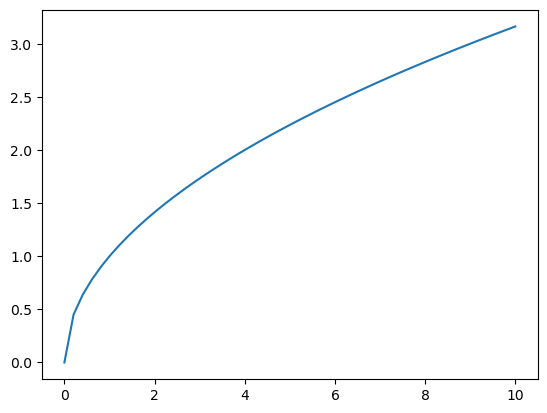

In [5]:
import matplotlib.pyplot as plt

plt.plot(x,y)

## What are pandas and xarray?
- Pandas --> like a spreadsheet 2D data with columns and rows
- xarray --> like pandas, but in N dimensions
- **Use the functionality these packages gives you! Will help you avoid mistakes. Try to get as good as possible :)**


### Pandas
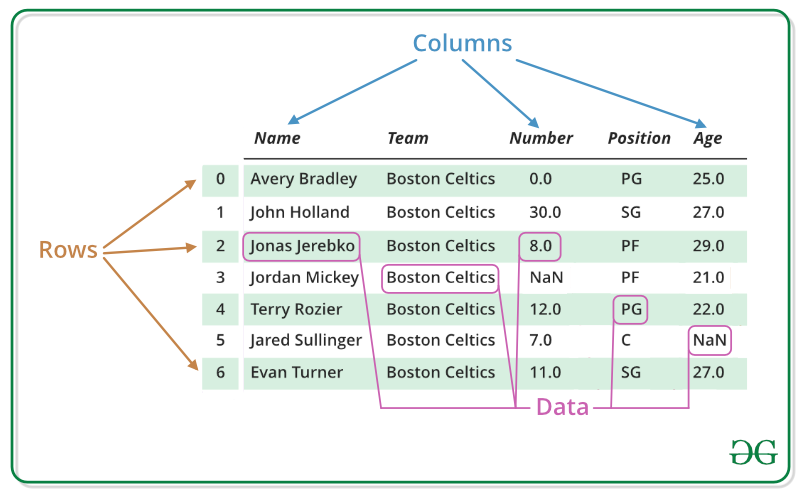
(Source: https://www.geeksforgeeks.org/python-pandas-dataframe/)

### Xarray
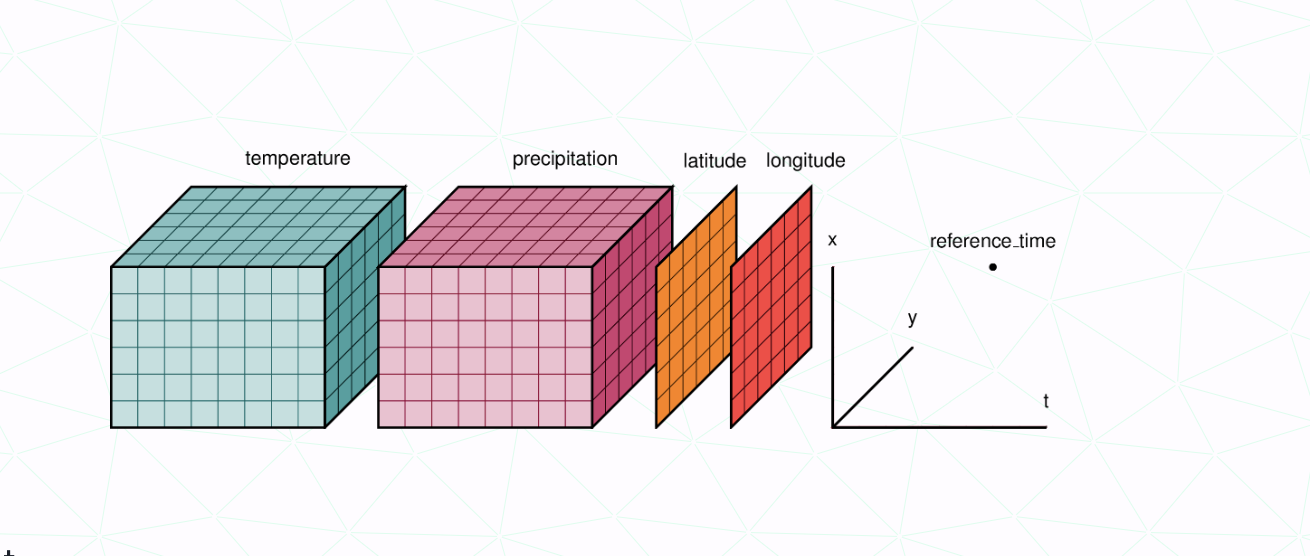
(Source: https://docs.xarray.dev/)

# 1. Read in CMIP6 data: We will skip this next part, but you can check it later to read data: 
#### Import python packages

In [6]:
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

### Open CMIP6 online catalog

In [7]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60



### Search corresponding data 

Please check [here](https://pangeo-data.github.io/escience-2022/pangeo101/data_discovery.html?highlight=cmip6) for info about CMIP and variables :) 

Particularly useful is maybe the variable search which you find here: https://clipc-services.ceda.ac.uk/dreq/mipVars.html 

In [8]:
cat = col.search(source_id=['CESM2'], 
                 experiment_id=['historical'], table_id=['Amon','fx'], 
                 variable_id=['ua','va','tas','hurs', 'areacella', ], member_id=['r1i1p1f1'])
cat.df


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r1i1p1f1,fx,areacella,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
1,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,hurs,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
2,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,ua,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
3,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,va,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
4,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308


### Create dictionary from the list of datasets we found
- This step may take several minutes so be patient!

In [9]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [10]:
list(dset_dict.keys())

['CMIP.NCAR.CESM2.historical.fx.gn', 'CMIP.NCAR.CESM2.historical.Amon.gn']

### Open dataset

- Use `xarray` python package to analyze netCDF dataset
- `open_dataset` allows to get all the metadata without loading data into memory. 
- with `xarray`, we only load into memory what is needed.

<span style="color:blue;font-weight:700;font-size:20px">
Notice the dictionary!!!!
</span>



In [11]:
dset_dict.keys()

dict_keys(['CMIP.NCAR.CESM2.historical.fx.gn', 'CMIP.NCAR.CESM2.historical.Amon.gn'])

In [12]:
ds1 = dset_dict['CMIP.NCAR.CESM2.historical.Amon.gn']
ds2 = dset_dict['CMIP.NCAR.CESM2.historical.fx.gn']


In [13]:
ds1

<xarray.Dataset>
Dimensions:    (member_id: 1, time: 1980, lat: 192, lon: 288, nbnd: 2, plev: 19)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float32 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float32 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f1'
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
Dimensions without coordinates: nbnd
Data variables:
    hurs       (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288), meta=np.ndarray>
    tas        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288), meta=np.ndarray>
    ua         (member_id, time, plev, lat, lon) float32 dask.array<chunksize=(1, 30, 19, 192, 288), meta=np.ndarray>
    va         (member_id, time, plev, lat, lon) float32 dask.array<chunksize=(1, 30, 19, 192, 288), meta=np.ndarray>
Attributes: (12/47)
    cesm_casename:           b.e21.BHIST.f09_g17.CMIP6-historical.001
    grid:                    native 0.9x1.25 finite volume grid (192x288 latx...
    experiment:              all-forcing simulation of the recent past
    model_doi_url:           https://doi.org/10.5065/D67H1H0V
    grid_label:              gn
    nominal_resolution:      100 km
    ...                      ...
    parent_variant_label:    r1i1p1f1
    intake_esm_varname:      hurs\ntas\nua\nva
    tracking_id:             hdl:21.14100/1c4d4e5f-15ac-4694-917e-81b85fde5f2...
    version_id:              v20190308
    branch_time_in_parent:   219000.0
    intake_esm_dataset_key:  CMIP.NCAR.CESM2.historical.Amon.gn

<span style="color:black;font-weight:700;font-size:20px">
Since I have already checked that these datasets are on the same grid, we can merge them:
</span>




<span style="color:blue;font-weight:700;font-size:20px">
Notice the list comprehension!!!!
</span>



List comprehension is a very efficient way of making lists: 

In [14]:
li = [1,2,4,5,]

li21 = [f'no{i}' for i in li]
li2 = list()
for i in li:
    li2.append(f'no{i}')
print(li2)
print(li21)

['no1', 'no2', 'no4', 'no5']
['no1', 'no2', 'no4', 'no5']


In [15]:
ds_list = [dset_dict[l] for l in dset_dict.keys()]

ds = xr.merge(ds_list)

In [16]:
ds

<xarray.Dataset>
Dimensions:    (member_id: 1, lat: 192, lon: 288, nbnd: 2, time: 1980, plev: 19)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float32 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float32 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f1'
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
Dimensions without coordinates: nbnd
Data variables:
    areacella  (member_id, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    hurs       (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288), meta=np.ndarray>
    tas        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288), meta=np.ndarray>
    ua         (member_id, time, plev, lat, lon) float32 dask.array<chunksize=(1, 30, 19, 192, 288), meta=np.ndarray>
    va         (member_id, time, plev, lat, lon) float32 dask.array<chunksize=(1, 30, 19, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    674885.0
    branch_time_in_parent:   219000.0
    case_id:                 15
    ...                      ...
    variant_label:           r1i1p1f1
    status:                  2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/75033260-7bd2-46b9-9d98-3456f176d588
    version_id:              v20190308
    intake_esm_varname:      ['areacella']
    intake_esm_dataset_key:  CMIP.NCAR.CESM2.historical.fx.gn

## 1.1 Reading in the data from file:

```python
path='filename.nc'
ds = xr.open_dataset(path)
```

##### Opening multiple files:

```python

list_of_files = [
    'file1.nc',
    'file2.nc'
]
xr.open_mfdataset(list_of_files, concat_dim='time',combine='by_coords')
```

# 2. Check how your dataset looks

#### Different types of information/data:
- Coordinates
- Data variables
- Global attributes
- Variable attributes

## Fix time

In [17]:
ds['time'] = ds.indexes['time'].to_datetimeindex()


/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/coding/times.py:360: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]
/tmp/ipykernel_5264/3952460631.py:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()


## Select: sel and isel

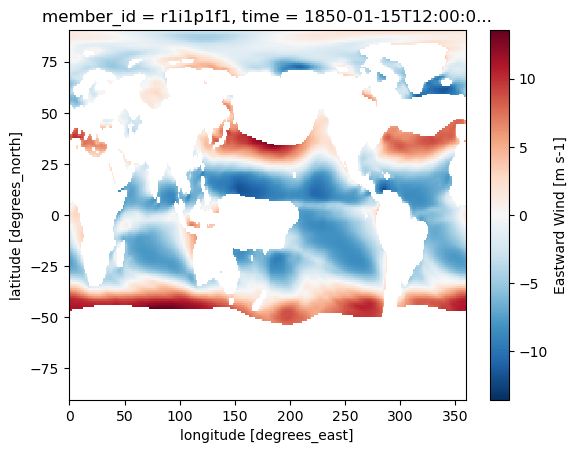

In [18]:
ds.isel(time=0, plev=0)['ua'].plot()

In [20]:
ds = ds.sel(time=slice('2010-01-01','2015-01-01'))

## Mask

(array([3.366300e+04, 7.669700e+04, 1.353320e+05, 3.965140e+05,
        1.932567e+06, 6.776010e+05, 6.429300e+04, 1.046000e+03,
        4.400000e+01, 3.000000e+00]),
 array([  7.2883644,  24.336588 ,  41.38481  ,  58.433037 ,  75.48126  ,
         92.52948  , 109.577705 , 126.62593  , 143.67415  , 160.72238  ,
        177.7706   ], dtype=float32),
 <BarContainer object of 10 artists>)

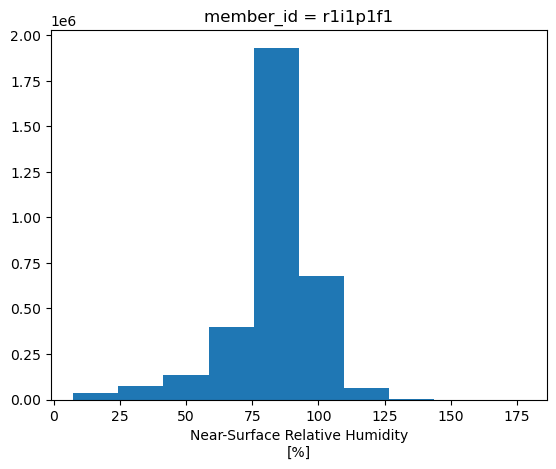

In [25]:
ds['hurs'].plot()

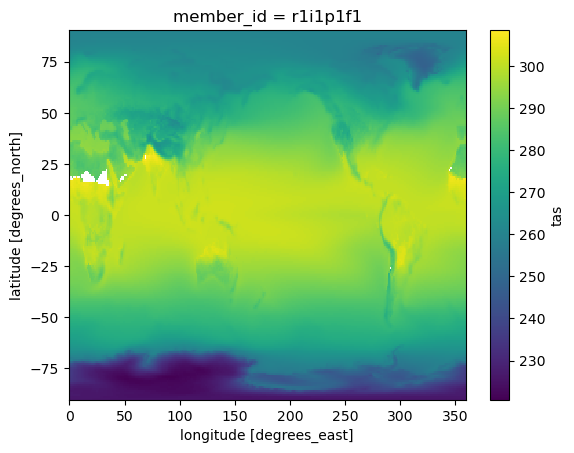

In [26]:
ds.where(ds['hurs']>50).mean('time')['tas'].plot()

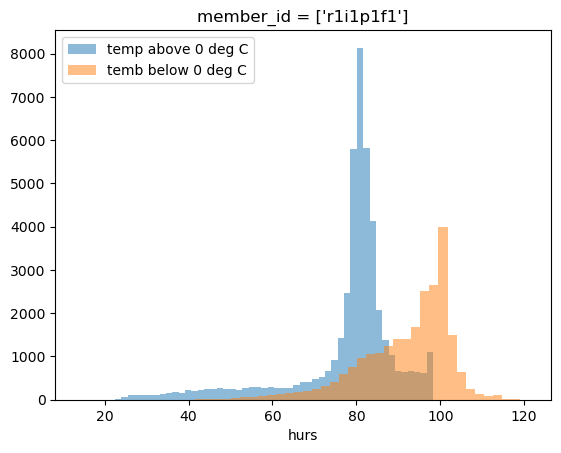

In [36]:
ds.where(ds['tas']>273.15).mean('time')['hurs'].plot.hist(bins=50, alpha=.5, label= 'temp above 0 deg C')
ds.where(ds['tas']<273.15).mean('time')['hurs'].plot.hist(bins=50, alpha=.5,label = 'temb below 0 deg C')
plt.legend()

### why is the humidity so much higher for low values? 
Because it's defined with relation to ice.

## To netcdf

# Using lists or dictionaries in a cool way

In [37]:
cat = col.search(#source_id=['CESM2', 'GFDL-CM4','MIROC','GISS-E2-1-G','CanESM5'], 
                 experiment_id=['historical'], table_id=['Amon','fx'], 
                 grid_label=['gr1'],
                 variable_id=['ua','va','tas','hurs',],# 'areacella', ], 
                 member_id=['r1i1p1f1'])
cat.df


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Amon,hurs,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
1,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
2,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Amon,va,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
3,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Amon,ua,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
4,CMIP,INM,INM-CM4-8,historical,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/INM/INM-CM4-8/historical...,NaN,20190530
5,CMIP,INM,INM-CM4-8,historical,r1i1p1f1,Amon,hurs,gr1,gs://cmip6/CMIP6/CMIP/INM/INM-CM4-8/historical...,NaN,20190530
6,CMIP,INM,INM-CM4-8,historical,r1i1p1f1,Amon,va,gr1,gs://cmip6/CMIP6/CMIP/INM/INM-CM4-8/historical...,NaN,20190605
7,CMIP,INM,INM-CM4-8,historical,r1i1p1f1,Amon,ua,gr1,gs://cmip6/CMIP6/CMIP/INM/INM-CM4-8/historical...,NaN,20190605
8,CMIP,INM,INM-CM5-0,historical,r1i1p1f1,Amon,hurs,gr1,gs://cmip6/CMIP6/CMIP/INM/INM-CM5-0/historical...,NaN,20190610
9,CMIP,INM,INM-CM5-0,historical,r1i1p1f1,Amon,va,gr1,gs://cmip6/CMIP6/CMIP/INM/INM-CM5-0/historical...,NaN,20190610


In [38]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [39]:
list(dset_dict.keys())

['CMIP.KIOST.KIOST-ESM.historical.Amon.gr1',
 'CMIP.INM.INM-CM4-8.historical.Amon.gr1',
 'CMIP.INM.INM-CM5-0.historical.Amon.gr1',
 'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amon.gr1',
 'CMIP.NOAA-GFDL.GFDL-CM4.historical.Amon.gr1']

Lets say we want to 

In [40]:
for m in dset_dict:
    _ds = dset_dict[m]
    _ds = _ds.sel(time= slice('1980-01-01','2010-01-01'))
    dset_dict[m] = _ds

In [41]:
for m in dset_dict.keys():
    _ds = dset_dict[m]
    _ds['wind_strength'] = np.sqrt(_ds['ua']**2 + _ds['va']**2)
    dset_dict[m] = _ds

In [42]:
for m in dset_dict.keys():
    _ds = dset_dict[m]
    fn = f'Data/{m}_computed_wind_strenght.nc'
    print(fn)
    _ds.to_netcdf(fn)

Data/CMIP.KIOST.KIOST-ESM.historical.Amon.gr1_computed_wind_strenght.nc
Data/CMIP.INM.INM-CM4-8.historical.Amon.gr1_computed_wind_strenght.nc
Data/CMIP.INM.INM-CM5-0.historical.Amon.gr1_computed_wind_strenght.nc
Data/CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amon.gr1_computed_wind_strenght.nc
Data/CMIP.NOAA-GFDL.GFDL-CM4.historical.Amon.gr1_computed_wind_strenght.nc


Now you can continue your work even in another notebook without doing the calculations again!

In [50]:
model_list = [
    'CMIP.KIOST.KIOST-ESM.historical.Amon.gr1',
    'CMIP.INM.INM-CM4-8.historical.Amon.gr1',
    'CMIP.INM.INM-CM5-0.historical.Amon.gr1',
    'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amon.gr1',
    'CMIP.NOAA-GFDL.GFDL-CM4.historical.Amon.gr1',
]

### Read the data in again

In [1]:
from pathlib import Path

In [3]:
pa = Path('Data')
pa.mkdir(exist_ok=True)

In [60]:
dset_dict = dict()
for m in model_list:
    #_ds = dset_dict[m]
    print(m)
    fn = f'Data/{m}_computed_wind_strenght.nc'
    print(fn)
    _ds = xr.open_dataset(fn)
    dset_dict[m] = _ds

CMIP.KIOST.KIOST-ESM.historical.Amon.gr1
Data/CMIP.KIOST.KIOST-ESM.historical.Amon.gr1_computed_wind_strenght.nc
CMIP.INM.INM-CM4-8.historical.Amon.gr1
Data/CMIP.INM.INM-CM4-8.historical.Amon.gr1_computed_wind_strenght.nc
CMIP.INM.INM-CM5-0.historical.Amon.gr1
Data/CMIP.INM.INM-CM5-0.historical.Amon.gr1_computed_wind_strenght.nc
CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amon.gr1
Data/CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amon.gr1_computed_wind_strenght.nc
CMIP.NOAA-GFDL.GFDL-CM4.historical.Amon.gr1
Data/CMIP.NOAA-GFDL.GFDL-CM4.historical.Amon.gr1_computed_wind_strenght.nc


In [61]:
import cartopy as cy


### Zip through list

In [62]:
for i,j in zip([1,2,4],[6,7,8]):
    print(i,j)

1 6
2 7
4 8


In [63]:
def add_map_details(ax):
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True)
    ax.add_feature(cy.feature.BORDERS);
    return 
    

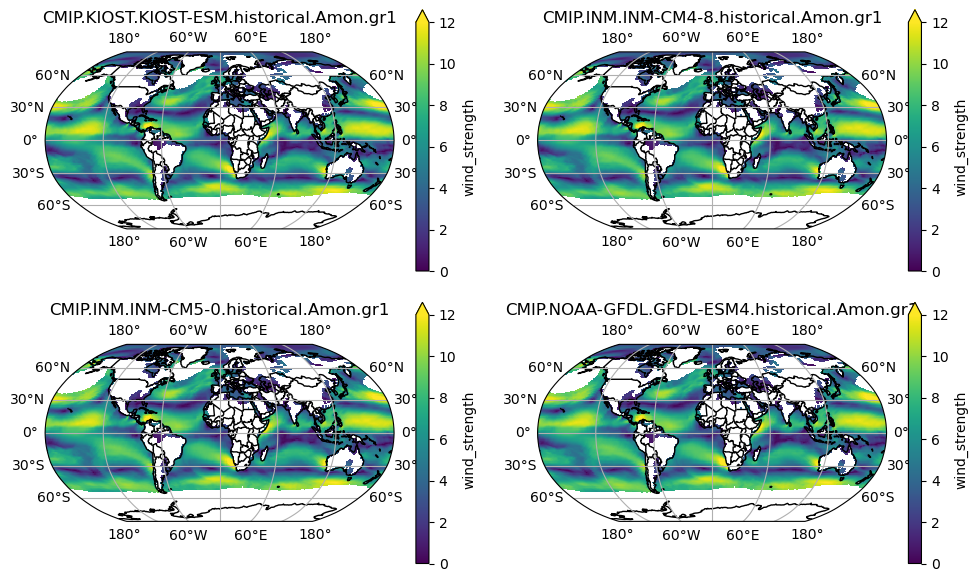

In [64]:
f, axs = plt.subplots(2,2,
                     #dpi =100,
                      figsize=[10, 6],
                     subplot_kw = {'projection':ccrs.Robinson()}
                    )

for key, ax in zip(dset_dict, axs.flatten()):
    _ds['wind_strength'].isel(time=0, plev=0).plot(ax = ax, vmin = 0, vmax = 12, 
                                                   #add_colorbar=True, 
                                                   transform = ccrs.PlateCarree())
    ax.set_title(key)
    add_map_details(ax)
    #ax.set_title('ilev:-1; Mean over Time')
f.tight_layout()